In [0]:
# Basic imports
import random
import time
import pandas as pd
import numpy as np

# Visualization imports
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import missingno as msno

# Split train and test
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion

# Feature Engineering
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Classification
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# Regression
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# Otimization
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Scores Classification
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Scores Regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

# Final Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Export model
import pickle

#Colab imports
from google.colab import files

In [3]:
df = pd.read_csv("/content/dados_clima.csv", sep=';')
#cod_ventos = pd.read_csv("/content/ventos.csv", sep=',')
print("Dataset has {} entries and {} features".format(*df.shape))

Dataset has 48591 entries and 19 features


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48591 entries, 0 to 48590
Data columns (total 19 columns):
Estacao                      48591 non-null int64
Data                         48591 non-null object
Hora                         48591 non-null int64
Precipitacao                 16227 non-null float64
TempBulboSeco                46996 non-null float64
TempBulboUmido               46926 non-null float64
TempMaxima                   15960 non-null float64
TempMinima                   16153 non-null float64
UmidadeRelativa              46527 non-null float64
PressaoAtmEstacao            47010 non-null float64
PressaoAtmMar                19680 non-null float64
DirecaoVento                 47029 non-null float64
VelocidadeVento              46973 non-null float64
Insolação                    15780 non-null float64
Nebulosidade                 48101 non-null float64
Evaporacao Piche             15413 non-null float64
Temp Comp Media              15361 non-null float64
Umidade Rela

In [5]:
#df = df.join(cod_ventos, on='DirecaoVento').drop(['codigo', ' descrição'], axis=1)
#df["DirecaoVento"] = df[" sigla"]
#df.drop([" sigla"], axis=1, inplace=True)
df

,Estacao,Data,Hora,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,DirecaoVento,VelocidadeVento,Insolação,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,82598,01/01/1961,0,NaN,NaN,NaN,30.4,NaN,NaN,NaN,NaN,NaN,NaN,11.7,NaN,10.6,27.30,68.75,7.00000
1,82598,01/01/1961,1200,NaN,28.4,23.4,NaN,24.5,64.0,1010.8,NaN,9.0,9.00000,NaN,4.00,NaN,NaN,NaN,NaN
2,82598,01/01/1961,1800,NaN,28.8,24.5,NaN,NaN,69.0,1008.0,NaN,9.0,5.00000,NaN,2.00,NaN,NaN,NaN,NaN
3,82598,02/01/1961,0,NaN,26.6,22.8,30.3,NaN,71.0,1010.7,NaN,9.0,7.00000,7.0,2.00,8.6,26.74,74.00,7.00000
4,82598,02/01/1961,1200,0.0,26.2,23.8,NaN,24.4,81.0,1011.6,NaN,9.0,5.00000,NaN,10.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48586,82598,07/10/19,1800,NaN,27.7,NaN,NaN,NaN,66.0,1007.3,1012.6,14.0,8.23104,NaN,7.50,NaN,NaN,NaN,NaN
48587,82598,08/10/19,0,NaN,25.9,NaN,29.8,NaN,77.0,1010.3,1015.6,14.0,4.62996,10.7,6.25,NaN,27.04,73.00,8.05956
48588,82598,08/10/19,1200,0.0,28.1,NaN,NaN,25.1,62.0,1009.9,1015.2,14.0,9.25992,NaN,7.50,NaN,NaN,NaN,NaN
48589,82598,08/10/19,1800,NaN,28.2,NaN,NaN,NaN,67.0,1006.8,1012.1,14.0,8.23104,NaN,2.50,NaN,NaN,NaN,NaN


In [0]:
df["Data"] = pd.to_datetime(df['Data'])

In [0]:
df['Day'] = df['Data'].dt.day
df['Month'] = df['Data'].dt.month
df['Year'] = df['Data'].dt.year

df['Week'] = df['Data'].dt.week
df['DayOfWeek'] = df['Data'].dt.dayofweek

In [8]:
df.corr()[['VelocidadeVento']]

,VelocidadeVento
Estacao,NaN
Hora,0.312860
Precipitacao,-0.233790
TempBulboSeco,0.283498
TempBulboUmido,-0.018274
TempMaxima,-0.066169
TempMinima,-0.065876
UmidadeRelativa,-0.427727
PressaoAtmEstacao,0.151287
PressaoAtmMar,-0.004170


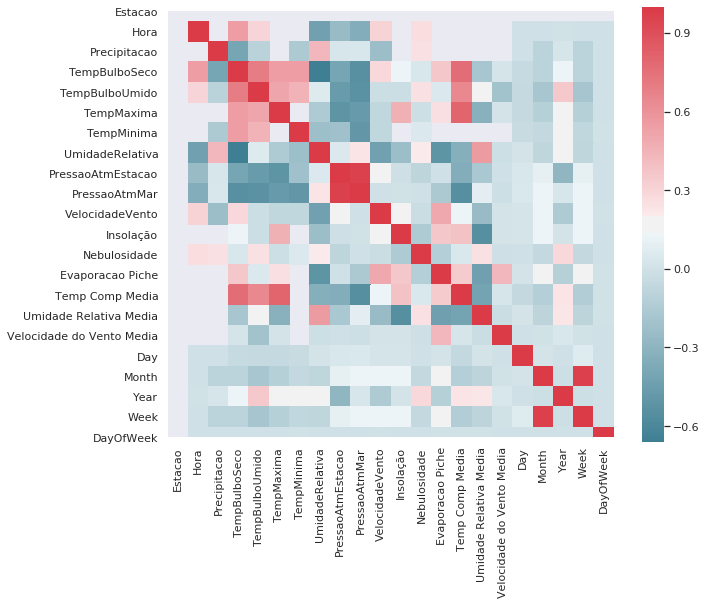

In [0]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), mask=np.zeros_like(df.corr(), dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

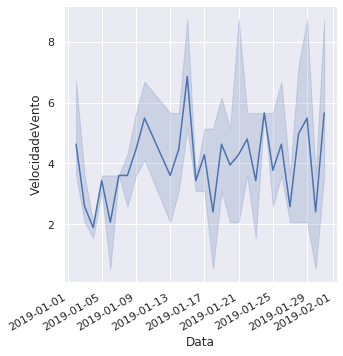

In [0]:
g = sns.relplot(x="Data",
                y="VelocidadeVento",
#                data=df[df['Data'] < pd.Timestamp('2018-04-01')], kind="line",
                data=df[np.logical_and(df['Data'] > pd.Timestamp('2019-01-01'), df['Data'] < pd.Timestamp('2019-02-01')) ], kind="line",                
                #style="Hora", height=10
                )
g.fig.autofmt_xdate()

In [0]:
data = df.loc[pd.notnull(df['VelocidadeVento'])].copy()

In [0]:
#data = pd.concat([data, pd.get_dummies(data, prefix="VentoDir", columns=["DirecaoVento"], drop_first=True)])

In [0]:
#data.drop(['DirecaoVento'], axis=1, inplace=True)

In [0]:
data

,Estacao,Data,Hora,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,DirecaoVento,VelocidadeVento,Insolação,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Day,Month,Year,Week,DayOfWeek
1,82598,1961-01-01,1200,NaN,28.4,23.4,NaN,24.5,64.0,1010.8,NaN,E,9.00000,NaN,4.00,NaN,NaN,NaN,NaN,1,1,1961,52,6
2,82598,1961-01-01,1800,NaN,28.8,24.5,NaN,NaN,69.0,1008.0,NaN,E,5.00000,NaN,2.00,NaN,NaN,NaN,NaN,1,1,1961,52,6
3,82598,1961-02-01,0,NaN,26.6,22.8,30.3,NaN,71.0,1010.7,NaN,E,7.00000,7.0,2.00,8.6,26.74,74.0,7.00000,1,2,1961,5,2
4,82598,1961-02-01,1200,0.0,26.2,23.8,NaN,24.4,81.0,1011.6,NaN,E,5.00000,NaN,10.00,NaN,NaN,NaN,NaN,1,2,1961,5,2
5,82598,1961-02-01,1800,NaN,28.7,23.8,NaN,NaN,65.0,1009.0,NaN,E,9.00000,NaN,3.00,NaN,NaN,NaN,NaN,1,2,1961,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48586,82598,2019-07-10,1800,NaN,27.7,NaN,NaN,NaN,66.0,1007.3,1012.6,SE,8.23104,NaN,7.50,NaN,NaN,NaN,NaN,10,7,2019,28,2
48587,82598,2019-08-10,0,NaN,25.9,NaN,29.8,NaN,77.0,1010.3,1015.6,SE,4.62996,10.7,6.25,NaN,27.04,73.0,8.05956,10,8,2019,32,5
48588,82598,2019-08-10,1200,0.0,28.1,NaN,NaN,25.1,62.0,1009.9,1015.2,SE,9.25992,NaN,7.50,NaN,NaN,NaN,NaN,10,8,2019,32,5
48589,82598,2019-08-10,1800,NaN,28.2,NaN,NaN,NaN,67.0,1006.8,1012.1,SE,8.23104,NaN,2.50,NaN,NaN,NaN,NaN,10,8,2019,32,5


In [0]:
# Random value for states
random_state = 42

# split-out train/validation and test dataset
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels="VelocidadeVento",axis=1),
                                                    data["VelocidadeVento"],
                                                    test_size=0.30,
                                                    random_state=random_state,
                                                    shuffle=True)

In [0]:
#Custom Transformer that extracts columns passed as argument to its constructor 
class FeatureSelector( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        self.feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self.feature_names ] 

In [0]:
target_variables = list(X_train.columns)
DateTime_variables = ['Data', 'Day', 'Month', 'Year', 'Week', 'DayOfWeek']

for col in DateTime_variables:
  target_variables.remove(col)

print(target_variables)
# Defining the steps in the numerical pipeline

#numerical_features = target_variables+DateTime_variables

numerical_pipeline = Pipeline(steps = [('num_selector', FeatureSelector(target_variables)),
                                       ('std_imputer', SimpleImputer(np.NaN, "mean")) 
                                       ]
                              )
# Combining numerical and categorical piepline into one full big pipeline horizontally 
# using FeatureUnion
full_pipeline_preprocessing = FeatureUnion(transformer_list = [
                                                               ('numerical_pipeline', numerical_pipeline)
                                                              ]
                                          )

In [0]:
target_variables = ['Hora', 'TempBulboSeco', 'TempBulboUmido', 'TempMinima', 'UmidadeRelativa', 'PressaoAtmEstacao', 'Precipitacao' ,'Nebulosidade']
DateTime_variables = ['Day', 'Month', 'Year', 'Week', 'DayOfWeek']

# Defining the steps in the numerical pipeline

numerical_features = target_variables+DateTime_variables

numerical_pipeline = Pipeline(steps = [('num_selector', FeatureSelector(numerical_features)),
                                       ('std_imputer', SimpleImputer(np.NaN, "mean")) 
                                       ]
                              )
# Combining numerical and categorical piepline into one full big pipeline horizontally 
# using FeatureUnion
full_pipeline_preprocessing = FeatureUnion(transformer_list = [
                                                               ('numerical_pipeline', numerical_pipeline)
                                                              ]
                                          )

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32881 entries, 42970 to 16334
Data columns (total 23 columns):
Estacao                      32881 non-null int64
Data                         32881 non-null datetime64[ns]
Hora                         32881 non-null int64
Precipitacao                 10938 non-null float64
TempBulboSeco                32117 non-null float64
TempBulboUmido               32012 non-null float64
TempMaxima                   10821 non-null float64
TempMinima                   10901 non-null float64
UmidadeRelativa              31776 non-null float64
PressaoAtmEstacao            32076 non-null float64
PressaoAtmMar                13080 non-null float64
DirecaoVento                 32874 non-null object
Insolação                    10687 non-null float64
Nebulosidade                 32858 non-null float64
Evaporacao Piche             10413 non-null float64
Temp Comp Media              10474 non-null float64
Umidade Relativa Media       10475 non-null float64
V

In [0]:
X_train.head()

,Estacao,Data,Hora,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,DirecaoVento,Insolação,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Day,Month,Year,Week,DayOfWeek
42970,82598,2014-08-19,1800,NaN,26.8,24.0,NaN,NaN,79.0,1008.6,1013.9,S,NaN,9.0,NaN,NaN,NaN,NaN,19,8,2014,34,1
18469,82598,1992-09-03,0,NaN,27.2,25.0,30.0,NaN,84.0,1005.3,NaN,E,7.5,5.0,6.0,27.54,81.25,4.333333,3,9,1992,36,3
27456,82598,2000-06-22,1200,0.0,26.0,25.0,NaN,19.0,92.0,1010.8,NaN,S,NaN,7.0,NaN,NaN,NaN,NaN,22,6,2000,25,3
3260,82598,1964-01-18,1200,10.8,28.0,26.0,NaN,23.8,85.0,1012.8,NaN,NE,NaN,10.0,NaN,NaN,NaN,NaN,18,1,1964,3,5
27288,82598,2000-04-27,1200,2.6,28.2,26.8,NaN,19.0,90.0,1008.7,NaN,SE,NaN,7.0,NaN,NaN,NaN,NaN,27,4,2000,17,3


In [0]:
num_folds = 10
from sklearn.model_selection import StratifiedKFold
pipe = Pipeline(steps = [
                         ('full_pipeline', full_pipeline_preprocessing),
                         ("clf",XGBRegressor()),
                         #("tree",RandomForestClassifier())
                        ]
                )

search_space = [
                {"clf":[XGBRegressor()],
                 "clf__n_estimators": [10, 50, 100],
                 "clf__max_depth": [1, 2, 3],
                 "clf__learning_rate": [0.2, 0.25, 0.3],
                 #"clf__random_state": [42, 21],
                 #"clf__subsample": [0.8, 0.9, 1.0],
                 #"clf__colsample_bytree": [0.8, 0.9, 1.0],
                 "clf__n_jobs": [-1]
                 },
#                {"tree":[RandomForestClassifier()]
#                }
                ]

kfold = KFold(n_splits=num_folds, random_state=42)

grid = GridSearchCV(estimator=pipe, 
                    param_grid=search_space,
                    cv=kfold,
                    return_train_score=True,
                    n_jobs=-1)

tmp = time.time()

best_model = grid.fit(X_train[DateTime_variables + target_variables].copy(), y_train)

print("CPU Training Time: %s seconds" % (str(time.time() - tmp)))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU Training Time: 178.94485092163086 seconds


In [0]:
print("Best: %.4f using %s" % (best_model.best_score_,best_model.best_params_))

Best: 0.4364 using {'clf': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1), 'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'clf__n_jobs': -1}


In [0]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__learning_rate,param_clf__max_depth,param_clf__n_estimators,param_clf__n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.821222,0.098011,0.019826,0.004250,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.2,1,10,-1,"{'clf': XGBRegressor(base_score=0.5, booster='...",0.171258,0.184112,0.177609,0.177048,0.160125,0.171801,0.164497,0.177168,0.163680,0.165524,0.171282,0.007309,27,0.173180,0.170958,0.171272,0.171617,0.174851,0.173275,0.174054,0.171856,0.174042,0.172878,0.172798,0.001254
1,2.392267,0.061449,0.024490,0.007598,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.2,1,50,-1,"{'clf': XGBRegressor(base_score=0.5, booster='...",0.310128,0.332187,0.317470,0.315984,0.305339,0.309703,0.306751,0.319786,0.308772,0.314611,0.314073,0.007543,20,0.316716,0.314569,0.315711,0.315746,0.317982,0.316899,0.317590,0.315072,0.317657,0.315461,0.316340,0.001127
2,4.473297,0.037349,0.033504,0.010279,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.2,1,100,-1,"{'clf': XGBRegressor(base_score=0.5, booster='...",0.336725,0.360498,0.342858,0.341541,0.330224,0.334648,0.332188,0.347598,0.335043,0.342107,0.340343,0.008440,16,0.343087,0.340724,0.342270,0.342507,0.344679,0.343388,0.344136,0.341902,0.344710,0.341996,0.342940,0.001238
3,1.000872,0.038060,0.018073,0.000573,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.2,2,10,-1,"{'clf': XGBRegressor(base_score=0.5, booster='...",0.224031,0.240001,0.233275,0.234861,0.219633,0.234520,0.221655,0.241535,0.219411,0.224197,0.229312,0.008010,25,0.227907,0.228321,0.231139,0.232582,0.235772,0.235205,0.234900,0.231834,0.228106,0.227796,0.231356,0.003049
4,3.535791,0.045269,0.025277,0.001071,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.2,2,50,-1,"{'clf': XGBRegressor(base_score=0.5, booster='...",0.362411,0.384206,0.366270,0.364433,0.351179,0.358188,0.357205,0.376814,0.357391,0.370648,0.364875,0.009513,12,0.368755,0.367522,0.368411,0.369321,0.370836,0.370377,0.370445,0.368795,0.368883,0.368725,0.369207,0.000988
5,6.712422,0.057976,0.034389,0.001095,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.2,2,100,-1,"{'clf': XGBRegressor(base_score=0.5, booster='...",0.380134,0.400563,0.383621,0.381079,0.369090,0.375462,0.374338,0.396681,0.375500,0.388244,0.382471,0.009562,9,0.388242,0.387729,0.387872,0.388324,0.390806,0.389964,0.389563,0.388520,0.388989,0.388641,0.388865,0.000928
6,1.243705,0.029468,0.019097,0.000864,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.2,3,10,-1,"{'clf': XGBRegressor(base_score=0.5, booster='...",0.271145,0.290961,0.279836,0.278709,0.267401,0.277512,0.259342,0.290564,0.271046,0.274924,0.276144,0.009278,23,0.275757,0.279711,0.280216,0.277718,0.287985,0.276108,0.276489,0.278124,0.279697,0.278689,0.279049,0.003330
7,4.759990,0.071152,0.029941,0.001323,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.2,3,50,-1,"{'clf': XGBRegressor(base_score=0.5, booster='...",0.384967,0.406723,0.391306,0.392712,0.375740,0.383609,0.380886,0.402505,0.385495,0.394902,0.389885,0.009175,6,0.399768,0.398676,0.399416,0.400192,0.401809,0.399052,0.398716,0.394938,0.398023,0.398492,0.398908,0.001670
8,9.062708,0.117719,0.044344,0.002068,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.2,3,100,-1,"{'clf': XGBRegressor(base_score=0.5, booster='...",0.395915,0.415193,0.401548,0.403211,0.389489,0.393785,0.394077,0.415304,0.397730,0.405391,0.401165,0.008362,3,0.415495,0.413535,0.415918,0.416520,0.417489,0.415132,0.415158,0.412225,0.414493,0.414629,0.415060,0.001409
9,0.786093,0.023893,0.021132,

In [0]:
pred = best_model.predict(X_test)
mean_squared_error(y_test, pred)

2.2578601421797426

In [0]:
r2_score(y_test, pred)

0.4110507425986094

In [0]:
pd.DataFrame({"Originais":y_test.values, "Predições":pred})

,Originais,Predições
0,3.60000,4.222193
1,2.50000,4.353914
2,5.00000,4.670747
3,5.70000,6.259507
4,5.00000,4.646434
...,...,...
14087,3.60000,5.225083
14088,5.80000,4.385918
14089,4.30000,4.566325
14090,3.08664,4.514528
